<a href="https://colab.research.google.com/github/msadi1976/Machine_learning/blob/main/Quest_Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [28]:
import pandas as pd
import numpy as np


In [3]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [4]:
# What are the "type" of each column? 
print(df_titanic.dtypes)


Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


Name, Sex,Survived arenon-numeric columns

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

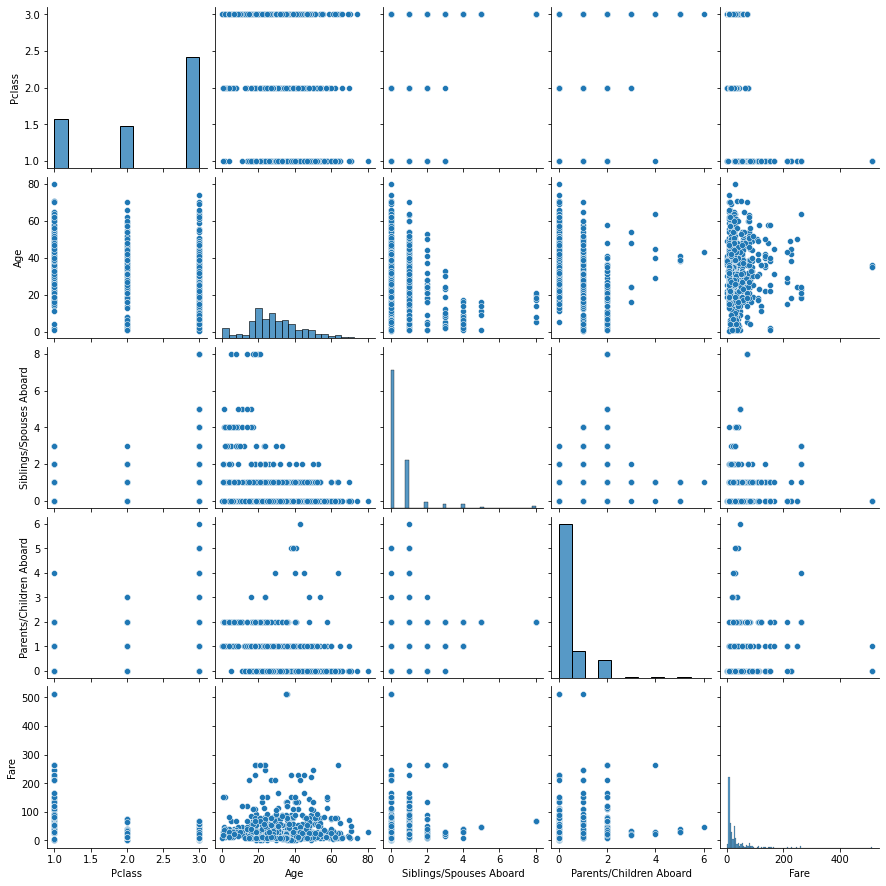

In [5]:
# First exploration:
import seaborn as sns
sns.pairplot(df_titanic)

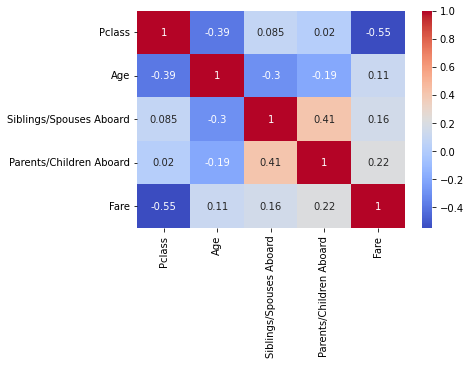

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_titanic.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

You are looking for Jack. How many people named Jack on board?

In [7]:
# How many people named Jack on board?
jack_count = df_titanic[df_titanic['Name'].str.contains("Jack")].shape[0]
print("Number of people named Jack on board is :", jack_count)

Number of people named Jack on board is : 1


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [8]:
# It's up to you:
#Select features (X) with only numeric values, and without "Survived" column
X=df_titanic[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
X

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
882,2,27.0,0,0,13.0000
883,1,19.0,0,0,30.0000
884,3,7.0,1,2,23.4500
885,1,26.0,0,0,30.0000


In [9]:
#Select "Survived" column as target (y)
y=df_titanic[['Survived']]
y

,Survived
0,Dead
1,Survived
2,Survived
3,Survived
4,Dead
...,...
882,Dead
883,Survived
884,Dead
885,Survived


In [10]:
#Split your data with random_state = 36
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=36)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 887
The length of the train dataset is   : 665
The length of the test dataset is    : 222


In [11]:
#Train a logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression().fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#Print the accuracy score on the train set and on the test set. Is there overfitting?
model.score(X_train, y_train)


0.718796992481203

In [13]:
# yes, there is overfitting because this two scores are too different
model.score(X_test, y_test)

0.6441441441441441

In [14]:
#Print the Confusion Matrix on the test set
from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,109,20
Survived ACTUAL,59,34


In [15]:
n_iter = model.n_iter_
print(n_iter)

[55]


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Change the weight of the classes to be more careful in predicting deaths
class_weights = {'Survived': 1, 'Dead': 10}

# Train a Logistic Regression model
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Evaluate the model on the train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

# Print the Confusion Matrix on the test set
#cm = confusion_matrix(y_test, y_test_pred)
cm=pd.DataFrame(data = confusion_matrix(y_test, y_test_pred),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")
print("Confusion Matrix:")
print(cm)

Train accuracy: 0.6300751879699248
Test accuracy: 0.5900900900900901
Confusion Matrix:
                 Dead PREDICTED  Survived PREDICTED
Dead ACTUAL                 129                   0
Survived ACTUAL              91                   2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [17]:
# It's up to you:
#Compute the prediction probabilities on your test set
sp=model.predict_proba(X_test.iloc[: , :])
sp

array([[0.90912458, 0.09087542],
       [0.98167958, 0.01832042],
       [0.96599843, 0.03400157],
       [0.90451778, 0.09548222],
       [0.98384237, 0.01615763],
       [0.96075281, 0.03924719],
       [0.97105645, 0.02894355],
       [0.97723136, 0.02276864],
       [0.69734041, 0.30265959],
       [0.96630714, 0.03369286],
       [0.96779095, 0.03220905],
       [0.88280347, 0.11719653],
       [0.87878612, 0.12121388],
       [0.96161705, 0.03838295],
       [0.96450563, 0.03549437],
       [0.9471366 , 0.0528634 ],
       [0.95647007, 0.04352993],
       [0.79907654, 0.20092346],
       [0.97633588, 0.02366412],
       [0.95849635, 0.04150365],
       [0.97499548, 0.02500452],
       [0.90008599, 0.09991401],
       [0.95348407, 0.04651593],
       [0.84305301, 0.15694699],
       [0.93139704, 0.06860296],
       [0.97494196, 0.02505804],
       [0.86086292, 0.13913708],
       [0.97470007, 0.02529993],
       [0.98722383, 0.01277617],
       [0.90576106, 0.09423894],
       [0.

In [18]:
#Which column is about "survived" probability?
model.classes_

array(['Dead', 'Survived'], dtype=object)

right column

In [19]:
#Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
sps=sp[:, 1]
sps


array([0.09087542, 0.01832042, 0.03400157, 0.09548222, 0.01615763,
       0.03924719, 0.02894355, 0.02276864, 0.30265959, 0.03369286,
       0.03220905, 0.11719653, 0.12121388, 0.03838295, 0.03549437,
       0.0528634 , 0.04352993, 0.20092346, 0.02366412, 0.04150365,
       0.02500452, 0.09991401, 0.04651593, 0.15694699, 0.06860296,
       0.02505804, 0.13913708, 0.02529993, 0.01277617, 0.09423894,
       0.05343022, 0.08649806, 0.12845493, 0.01735411, 0.69170713,
       0.02028751, 0.01802002, 0.12678779, 0.03369286, 0.05724205,
       0.04213124, 0.03693394, 0.02365382, 0.2832081 , 0.01212918,
       0.09190515, 0.03044045, 0.04216008, 0.01292841, 0.01035948,
       0.12807634, 0.04123479, 0.02364576, 0.02149928, 0.04561461,
       0.03551622, 0.01093908, 0.09600817, 0.02247604, 0.06207568,
       0.02892731, 0.01416085, 0.02892731, 0.03735122, 0.02618536,
       0.03548654, 0.22170263, 0.43112182, 0.04350424, 0.03560818,
       0.05197852, 0.07279268, 0.02248584, 0.48972846, 0.02713

In [20]:
#Display the passengers by sorting most likely to survive first (sorted_values() method?)
# Create a DataFrame to display the results
results = pd.DataFrame({"PassengerId": X_test.index, "Survived Probability": sps})

# Sort the DataFrame by the "Survived Probability" column in descending order
results.sort_values("Survived Probability", ascending=False, inplace=True)

# Display the passengers most likely to survive first
print(results)

     PassengerId  Survived Probability
34           303              0.691707
123          547              0.531570
73           309              0.489728
203          375              0.473628
67           733              0.431122
..           ...                   ...
179          322              0.009368
198          628              0.007593
134          480              0.004099
126          508              0.003490
197          535              0.003041

[222 rows x 2 columns]


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [21]:
# It's up to you:
# Select the 120 people with the highest probability of dying
most_at_risk = results.head(120)
most_at_risk

,PassengerId,Survived Probability
34,303,0.691707
123,547,0.531570
73,309,0.489728
203,375,0.473628
67,733,0.431122
...,...,...
85,595,0.041204
107,651,0.041150
159,619,0.039460
116,563,0.039260


In [23]:
# Count the number of people who actually survived
#actual_survivors = sum(y_test[most_at_risk.index] == "Survived")
df_two_people = df_titanic[df_titanic['Name'].isin(["Rev. Juozas Montvila","Mrs. William (Margaret Norton) Rice"])]
df_two_people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [26]:
df_two_people = df_titanic[df_titanic['Name'].isin(["Rev. Juozas Montvila","Mrs. William (Margaret Norton) Rice"])]
df_two_people

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,Dead,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.125
882,Dead,2,Rev. Juozas Montvila,male,27.0,0,0,13.000


In [29]:
model.predict_proba(df_two_people.select_dtypes(include=np.number))

array([[0.93243605, 0.06756395],
       [0.92067171, 0.07932829]])